In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'C:\Users\PC\Documents\creditcard')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\PC\\Documents\\creditcard'

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'

In [4]:
df.describe()

NameError: name 'df' is not defined

In [5]:
df.shape

(284807, 31)

In [6]:
df['Amount'].max()

25691.16

In [7]:
df['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64

In [8]:
df_fraud = df.loc[df['Class']==1]
df_fraud.head()
df_fraud.shape

(492, 31)

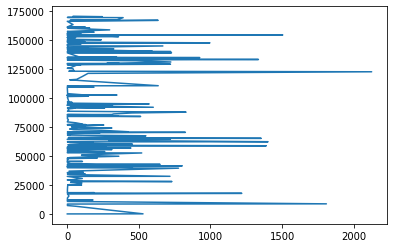

In [9]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df_fraud['Amount'],df_fraud['Time']);

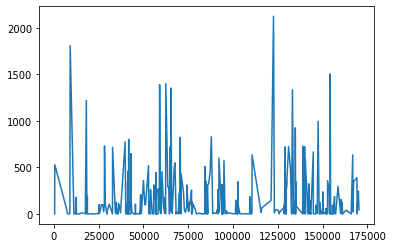

In [10]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df_fraud['Time'],df_fraud['Amount']);

In [11]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


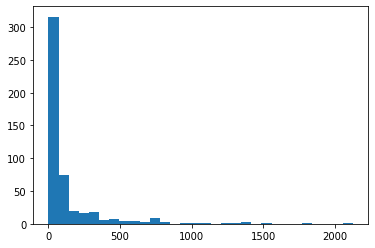

In [12]:
fig, ax = plt.subplots()
ax.hist(df_fraud['Amount'],bins = 30);

Text(0, 0.5, 'Fraud')

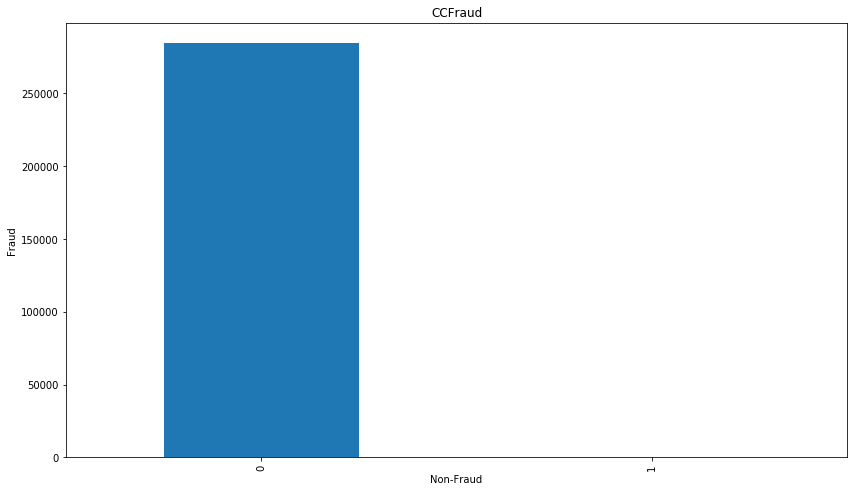

In [13]:
ax = df['Class'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="CCFraud")
ax.set_xlabel("Non-Fraud")
ax.set_ylabel("Fraud")

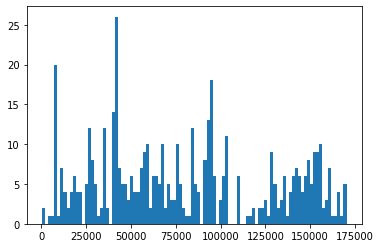

In [14]:
fig, ax = plt.subplots()
ax.hist(df_fraud['Time'],bins = 100);

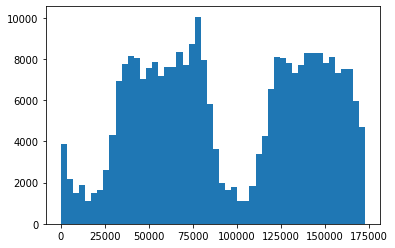

In [15]:
fig, ax = plt.subplots()
ax.hist(df['Time'],bins = 50);
#bimodal Histogram

In [16]:
#https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html
df_nonfraud = df.loc[df['Class']==0][:492]
final_df = pd.concat([df_nonfraud, df_fraud], sort=False)

In [17]:
final_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [18]:
final_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,40460.391260,-2.467403,1.905304,-3.083884,2.456780,-1.561726,-0.572584,-2.730903,0.261082,-1.301145,...,0.354898,-0.044481,-0.036529,-0.047380,0.087571,0.026120,0.096182,0.027865,96.224593,0.500000
std,52607.976219,5.407122,3.596109,6.435905,3.042722,4.202692,1.803657,5.863242,4.850081,2.266780,...,2.787267,1.145080,1.148960,0.586683,0.640419,0.468299,1.003732,0.442955,240.142397,0.500254
min,0.000000,-30.552380,-12.114213,-31.103685,-4.515824,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.243924,-7.263482,-2.733887,0.000000,0.000000
25%,167.000000,-2.788129,0.085200,-5.084967,0.345951,-1.692661,-1.442584,-3.060742,-0.170996,-2.222204,...,-0.173785,-0.533915,-0.226458,-0.415078,-0.216776,-0.296613,-0.039310,-0.049952,1.790000,0.000000
50%,383.000000,-0.781327,0.954502,-0.309446,1.383210,-0.390293,-0.510317,-0.433163,0.153493,-0.584912,...,0.093024,-0.028825,-0.050720,0.027849,0.127459,-0.015632,0.065185,0.037457,15.910000,0.500000
75%,75562.250000,0.870308,2.726800,0.934280,4.175332,0.427009,0.233236,0.304743,0.808184,0.114193,...,0.713646,0.440345,0.142884,0.393393,0.456121,0.308815,0.455031,0.217936,93.237500,1.000000
max,170348.000000,2.132386,22.057729,3.772857,12.114672,11.095089,6.474115,5.802537,20.007208,5.436633,...,27.202839,8.361985,5.466230,1.215279,2.208209,3.065576,3.052358,1.779364,3828.040000,1.000000


In [19]:
final_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
import seaborn as sns

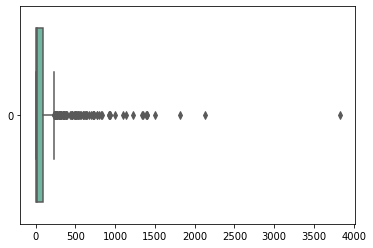

In [21]:
ax = sns.boxplot(data=final_df['Amount'], orient="h", palette="Set2")

In [22]:
from sklearn.model_selection import train_test_split
X = final_df.drop(['Class'],axis=1)
Y = final_df['Class']
x_train,x_test,y_train,y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [24]:
clf = LogisticRegression()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
pred

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
confusion_matrix(y_test, pred)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       164
           1       0.99      0.96      0.98       161

    accuracy                           0.98       325
   macro avg       0.98      0.98      0.98       325
weighted avg       0.98      0.98      0.98       325



array([[163,   1],
       [  6, 155]], dtype=int64)

In [26]:
svm = SVC()
svm.fit(x_train,y_train)
pred2 = svm.predict(x_test)
pred2

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [27]:
print(classification_report(y_test,pred2))
confusion_matrix(y_test, pred2)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       164
           1       1.00      0.94      0.97       161

    accuracy                           0.97       325
   macro avg       0.97      0.97      0.97       325
weighted avg       0.97      0.97      0.97       325



array([[164,   0],
       [  9, 152]], dtype=int64)

In [28]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred3 = knn.predict(x_test)
pred3

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,

In [29]:
print(classification_report(y_test,pred3))
confusion_matrix(y_test, pred3)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       164
           1       1.00      0.99      1.00       161

    accuracy                           1.00       325
   macro avg       1.00      1.00      1.00       325
weighted avg       1.00      1.00      1.00       325



array([[164,   0],
       [  1, 160]], dtype=int64)

In [30]:
dtr = DecisionTreeClassifier()
dtr.fit(x_train,y_train)
pred4 = dtr.predict(x_test)
pred4

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,

In [31]:
print(classification_report(y_test,pred4))
confusion_matrix(y_test, pred4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       161

    accuracy                           1.00       325
   macro avg       1.00      1.00      1.00       325
weighted avg       1.00      1.00      1.00       325



array([[164,   0],
       [  0, 161]], dtype=int64)

In [32]:
rfr = RandomForestClassifier()
rfr.fit(x_train,y_train)
pred5 = rfr.predict(x_test)
pred5

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,

In [33]:
print(classification_report(y_test,pred5))
confusion_matrix(y_test, pred5)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       164
           1       1.00      0.99      1.00       161

    accuracy                           1.00       325
   macro avg       1.00      1.00      1.00       325
weighted avg       1.00      1.00      1.00       325



array([[164,   0],
       [  1, 160]], dtype=int64)

In [34]:
from sklearn.model_selection import cross_val_score
svmr = SVC(kernel='linear', C=1)
scores = cross_val_score(svmr, X, Y, cv=4)
scores

array([0.78861789, 1.        , 1.        , 0.87804878])

In [35]:
scores_rfr = cross_val_score(rfr, X, Y, cv=5)

In [36]:
scores_rfr

array([0.96954315, 1.        , 1.        , 1.        , 0.98979592])

In [37]:
scores_dtr = cross_val_score(dtr, X, Y, cv=5)
scores_dtr

array([0.7715736 , 1.        , 1.        , 1.        , 0.88265306])

In [38]:
df_nonfraud_check = df.loc[df['Class']==0][492:]

In [39]:
xtest = df_nonfraud_check.drop(['Class'],axis=1)
ytest = df_nonfraud_check['Class']

In [40]:
predc = rfr.predict(xtest)

In [41]:
print(classification_report(ytest,predc))
confusion_matrix(ytest, predc)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.02      0.04    283823
           1       0.00      0.00      0.00         0

    accuracy                           0.02    283823
   macro avg       0.50      0.01      0.02    283823
weighted avg       1.00      0.02      0.04    283823



array([[  6027, 277796],
       [     0,      0]], dtype=int64)

Confusion matrix, without normalization
[[164   0]
 [  1 160]]
Normalized confusion matrix
[[1.         0.        ]
 [0.00621118 0.99378882]]


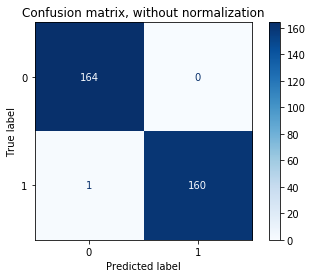

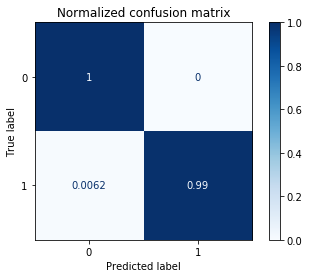

In [42]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfr, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [43]:
# Synthetic Minority Oversampling Technique(SMOTE)
training_features, test_features, \
training_target, test_target, = train_test_split(df.drop(['Class'], axis=1),
                                               df['Class'],
                                               test_size = .1,
                                               random_state=42)

In [44]:

x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=42)

In [50]:
!pip install imblearn
import numpy as np
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
print (y_train.value_counts(), np.bincount(y_train_res))

You should consider upgrading via the 'c:\users\pc\anaconda3\python.exe -m pip install --upgrade pip' command.


0    230310
1       383
Name: Class, dtype: int64 [230310 230310]


In [53]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=42)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(n_estimators=25, random_state=42)

In [55]:
from sklearn.metrics import recall_score
print ('Validation Results')
print (clf_rf.score(x_val, y_val))
print (recall_score(y_val, clf_rf.predict(x_val)))
print ('\nTest Results')
print (clf_rf.score(test_features, test_target))
print (recall_score(test_target, clf_rf.predict(test_features)))

Validation Results
0.9992977802052042
0.8095238095238095

Test Results
0.9995435553526912
0.8260869565217391


In [56]:
y_val.value_counts()

0    25570
1       63
Name: Class, dtype: int64

In [57]:
y_test.value_counts()

0    164
1    161
Name: Class, dtype: int64

In [58]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64